Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Linearni diskriminativni modeli

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **31. listopada 2021. u 23:59h**

------------------------------

### Upute

Ova laboratorijska vježba sastoji se od dva zadatka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [57]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [58]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

score: 1.0
params: {'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
accuracy: 1.0


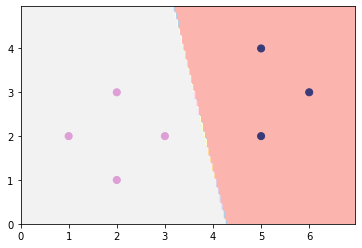

In [83]:
clf = RidgeClassifier().fit(seven_X, seven_y)
print("score: " + str(clf.score(seven_X, seven_y)))
print("params: " + str(clf.get_params()))
plot_2d_clf_problem(seven_X, seven_y, h=lambda x : clf.predict(x))
print("accuracy: " + str(accuracy_score(seven_y, clf.predict(seven_X))))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

score: 0.8833333333333333
coefs: [-0.25 -0.05]
intercept: 1.55


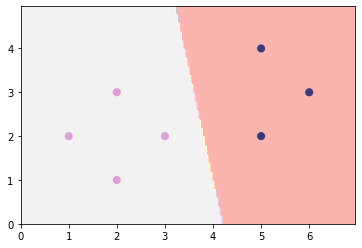

In [154]:
reg = LinearRegression().fit(seven_X, seven_y)
print("score: " + str(reg.score(seven_X, seven_y)))
print("coefs: " + str(reg.coef_))
print("intercept: " + str(reg.intercept_))
plot_2d_clf_problem(seven_X, seven_y, h=lambda x : reg.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [86]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

score: 0.875
params{'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
accuracy: 0.875



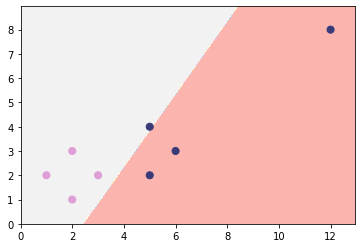

score: 0.660245183887916
coefs: [-0.20140105  0.15411559]
intercept: 0.9246935201401052


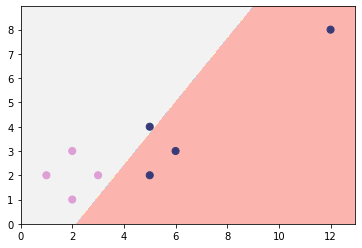

In [87]:
clf1 = RidgeClassifier().fit(outlier_X, outlier_y)
print("score: " + str(clf1.score(outlier_X, outlier_y)))
print("params" + str(clf1.get_params()))
plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x : clf1.predict(x))
print("accuracy: " + str(accuracy_score(outlier_y, clf1.predict(outlier_X))) + "\n")
plt.show()

reg1 = LinearRegression().fit(outlier_X, outlier_y)
print("score: " + str(reg1.score(outlier_X, outlier_y)))
print("coefs: " + str(reg1.coef_))
print("intercept: " + str(reg1.intercept_))
plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x : reg1.predict(x) >= 0.5)
plt.show()

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [88]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

score: 0.875
params{'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
accuracy: 0.875



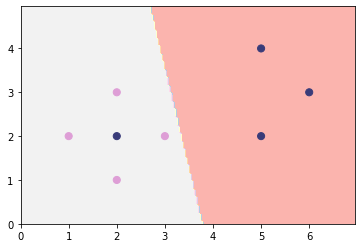

score: 0.5353535353535355
coefs: [-0.2020202  -0.04040404]
intercept: 1.2525252525252524
predictions: [ 0.80808081  0.72727273  0.96969697  0.56565657  0.16161616  0.08080808
 -0.08080808  0.76767677]



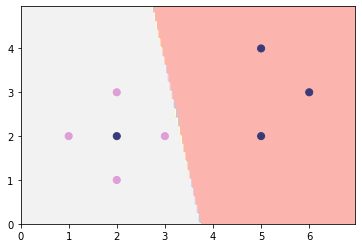

In [113]:
clf2 = RidgeClassifier().fit(unsep_X, unsep_y)
print("score: " + str(clf2.score(unsep_X, unsep_y)))
print("params" + str(clf2.get_params()))
plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x : clf2.predict(x))
print("accuracy: " + str(accuracy_score(unsep_y, clf2.predict(unsep_X))) + "\n")
plt.show()

reg2 = LinearRegression().fit(unsep_X, unsep_y)
print("score: " + str(reg2.score(unsep_X, unsep_y)))
print("coefs: " + str(reg2.coef_))
print("intercept: " + str(reg2.intercept_))
print("predictions: " + str(reg2.predict(unsep_X)) + "\n")
plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x : reg2.predict(x) >= 0.5)
plt.show()

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

array([0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2,
       1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0])

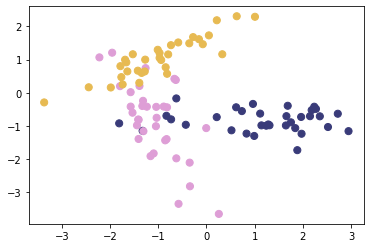

In [118]:
from sklearn.datasets import make_classification

data_set, class_labels = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
plot_2d_clf_problem(data_set, class_labels, h=None)
class_labels

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

score: 0.6036522797872907
coefs: [ 0.24028253 -0.08328795]
intercept: 0.3929342550582543


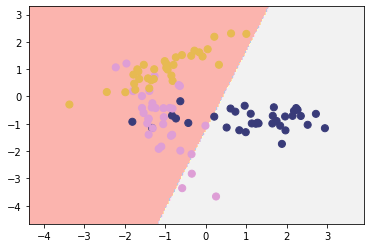

score: 0.6012640026645037
coefs: [-0.05943466  0.2870869 ]
intercept: 0.37511139097401014


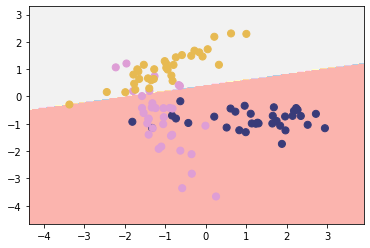

score: 0.4028459131881633
coefs: [-0.18084787 -0.20379895]
intercept: 0.23195435396773564


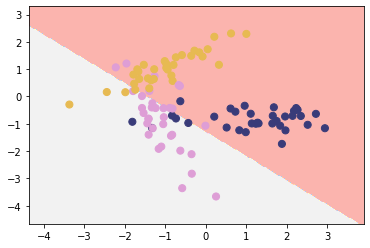

score: 0.4718885430530231
coefs: [-0.42113041 -0.12051101]
intercept: 0.8390200989094814


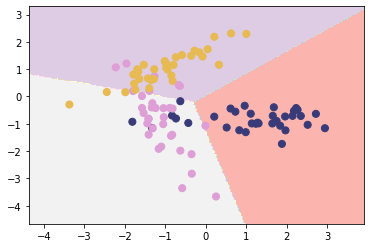

In [150]:
reg_class0 = LinearRegression().fit(data_set, [1 if y==0 else 0 for y in class_labels])
h1 = lambda x : reg_class0.predict(x) >= 0.5

reg_class1 = LinearRegression().fit(data_set, [1 if y==1 else 0 for y in class_labels])
h2 = lambda x : reg_class1.predict(x) >= 0.5

reg_class2 = LinearRegression().fit(data_set, [1 if y==2 else 0 for y in class_labels])
h3 = lambda x : reg_class2.predict([x]) >= 0.5

reg_classes = LinearRegression().fit(data_set, class_labels)
h = lambda x : np.array([np.argmax(values) for values in zip(reg_class0.predict(x), reg_class1.predict(x), reg_class2.predict(x))]).reshape(-1,1)

print("score: " + str(reg_class0.score(data_set, [1 if y==0 else 0 for y in class_labels])))
print("coefs: " + str(reg_class0.coef_))
print("intercept: " + str(reg_class0.intercept_))
#print("predictions: " + str(reg_class0.predict(data_set)) + "\n")
plot_2d_clf_problem(data_set, class_labels, h=h1)
plt.show()

print("score: " + str(reg_class1.score(data_set, [1 if y==1 else 0 for y in class_labels])))
print("coefs: " + str(reg_class1.coef_))
print("intercept: " + str(reg_class1.intercept_))
#print("predictions: " + str(reg_class1.predict(data_set)) + "\n")
plot_2d_clf_problem(data_set, class_labels, h=h2)
plt.show()

print("score: " + str(reg_class2.score(data_set, [1 if y==2 else 0 for y in class_labels])))
print("coefs: " + str(reg_class2.coef_))
print("intercept: " + str(reg_class2.intercept_))
#print("predictions: " + str(reg_class2.predict(data_set)) + "\n")
plot_2d_clf_problem(data_set, class_labels, h=h3)
plt.show()

print("score: " + str(reg_classes.score(data_set, class_labels)))
print("coefs: " + str(reg_classes.coef_))
print("intercept: " + str(reg_classes.intercept_))
plot_2d_clf_problem(data_set, class_labels, h=h)
plt.show()

score: 0.83
params{'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
accuracy: 0.83



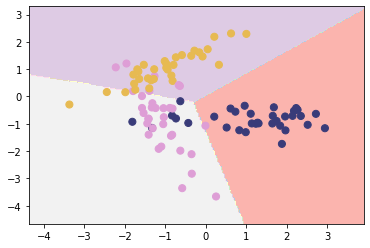

In [125]:
clf3 = RidgeClassifier().fit(data_set, class_labels)
print("score: " + str(clf3.score(data_set, class_labels)))
print("params" + str(clf3.get_params()))
plot_2d_clf_problem(data_set, class_labels, h=lambda x : clf3.predict(x))
print("accuracy: " + str(accuracy_score(class_labels, clf3.predict(data_set))) + "\n")
plt.show()